<a href="https://colab.research.google.com/github/VCornejo10/Tarea_red_neuronal_mnist/blob/main/Laboratorio_Red_Neuronal_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Laboratorio: Red Neuronal con MNIST  
**Curso:** Machine Learning  
**Total puntos:** 10

**Objetivo:** Implementar una red neuronal simple para clasificar dígitos escritos a mano del conjunto de datos MNIST utilizando Python y Keras.



## Paso 1: Cargar el conjunto de datos MNIST (1 punto)

Ejecuta el siguiente bloque para descargar y explorar el conjunto de datos.


In [7]:
from tensorflow.keras.datasets import mnist

# Cargar datos
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Tamaño del set de entrenamiento:", x_train.shape)
print("Tamaño del set de test:", x_test.shape)


Tamaño del set de entrenamiento: (60000, 28, 28)
Tamaño del set de test: (10000, 28, 28)



## Paso 2: Visualizar ejemplos del dataset (1 punto)

✏️ **Slot para completar:** Visualiza al menos 5 imágenes con sus etiquetas utilizando `matplotlib.pyplot.imshow()`.


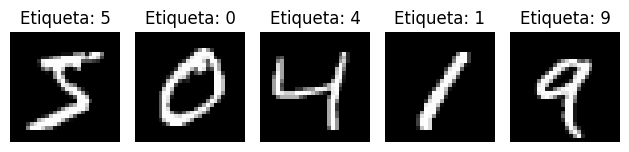

In [8]:
import matplotlib.pyplot as plt

# Visualizar las primeras 5 imágenes del conjunto de entrenamiento
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Etiqueta: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()



## Paso 3: Preprocesamiento (1 punto)

✏️ **Slot para completar:**
- Normaliza las imágenes (divide por 255.0).
- Aplana cada imagen a un vector de 784 valores.
- Codifica las etiquetas con `to_categorical`.


In [9]:
from tensorflow.keras.utils import to_categorical

# Normalización
x_train = x_train / 255.0
x_test = x_test / 255.0

# Aplanamiento
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# Codificación one-hot
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)



## Paso 4: Definir la red neuronal (2 puntos)

✏️ **Slot para completar:**
- Crea un modelo `Sequential`.
- Agrega una capa oculta con activación ReLU.
- Agrega una capa de salida con activación Softmax.
- Compila el modelo con `adam` y `categorical_crossentropy`.


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Definición del modelo con Input explícito
model = Sequential()
model.add(Input(shape=(784,)))  # Entrada del modelo
model.add(Dense(128, activation='relu'))  # Capa oculta
model.add(Dense(10, activation='softmax'))  # Capa de salida

# Compilación del modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



## Paso 5: Entrenar el modelo (1 punto)

✏️ **Slot para completar:** Entrena el modelo con `fit` durante 5 épocas y batch size 32.


In [11]:
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8738 - loss: 0.4507 - val_accuracy: 0.9667 - val_loss: 0.1180
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9631 - loss: 0.1269 - val_accuracy: 0.9687 - val_loss: 0.1099
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9752 - loss: 0.0839 - val_accuracy: 0.9760 - val_loss: 0.0845
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9820 - loss: 0.0616 - val_accuracy: 0.9775 - val_loss: 0.0774
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9870 - loss: 0.0443 - val_accuracy: 0.9777 - val_loss: 0.0739



## Paso 6: Evaluar el modelo (1 punto)

✏️ **Slot para completar:** Evalúa el modelo con `evaluate()` en el conjunto de prueba.


In [6]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Precisión en test: {test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9732 - loss: 0.0897
Precisión en test: 0.9753


## Preguntas de Reflexión (3 puntos en total)

### 1. ¿Qué ventaja observas al usar codificación one-hot para las etiquetas? (0.5 punto)

Permite representar las clases de manera que cada salida tenga un vector exclusivo, lo que es esencial para funciones de activación como softmax y para calcular correctamente el error con categorical_crossentropy.


### 2. ¿Qué ocurre si aumentas o disminuyes el número de neuronas ocultas? (0.5 punto)

Aumentar neuronas puede mejorar la capacidad de aprendizaje, pero también aumentar el riesgo de sobreajuste. Disminuirlas reduce la capacidad del modelo y puede generar bajo rendimiento.


### 3. ¿Qué alternativa propondrías al optimizador `adam` y por qué? (0.5 punto)

Podría usarse RMSprop o SGD con momentum. RMSprop es útil para problemas con ruido o con datos no estacionarios, y SGD permite más control aunque requiere más ajuste manual.


### 4. ¿Cómo cambia el desempeño si entrenas más épocas? ¿Cuál es el riesgo? (0.5 punto)

Más épocas pueden mejorar el aprendizaje en etapas iniciales, pero si se entrena demasiado, el modelo puede sobreajustarse al set de entrenamiento y generalizar peor al set de prueba.


### 5. ¿Por qué es importante dividir en conjuntos de entrenamiento y prueba? (1 punto)

Para evaluar si el modelo generaliza bien a nuevos datos. Si solo usamos datos de entrenamiento, no podríamos saber si está sobreajustado o realmente aprendió patrones útiles.
